In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lwhf.ml_logic.backtesting import backtesting

as_of_date = '2024-05-27'

port_return, weekly_returns, cleaned_weigths = backtesting(as_of_date, 3, 'W', 'alpaca_stock_prices')

Getting data from BQ


/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
/Users/behnamnajafi/Code/tim-boudot/lwhf-investment-strategy/lwhf/ml_logic/backtesting.py:29: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = time_df.pct_change()#.dropna()
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:89: UserWarning: Could not fix matrix. Please try a different risk mo

symbol         A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
symbol                                                                         
A       0.340000  0.168783  0.234132  0.150481  0.076593  0.075980  0.167789   
AAL     0.168783  1.185495  0.358182  0.184143  0.098153  0.107732  0.123881   
AAP     0.234132  0.358182  1.088290  0.103973  0.178735  0.084169  0.122896   
AAPL    0.150481  0.184143  0.103973  0.542638  0.059450  0.071552  0.106768   
ABBV    0.076593  0.098153  0.178735  0.059450  0.240939  0.075201  0.093927   
ABC     0.075980  0.107732  0.084169  0.071552  0.075201  0.178106  0.064553   
ABT     0.167789  0.123881  0.122896  0.106768  0.093927  0.064553  0.266180   
ACN     0.173402  0.232475  0.187797  0.187746  0.081110  0.074076  0.140638   
ADBE    0.217961  0.226086  0.134991  0.285626  0.055340  0.061815  0.153523   
ADI     0.209188  0.274823  0.142416  0.198120  0.054575  0.059014  0.120961   

symbol       ACN      ADBE       ADI  .

/Users/behnamnajafi/Code/tim-boudot/lwhf-investment-strategy/lwhf/ml_logic/backtesting.py:29: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = time_df.pct_change()#.dropna()
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:89: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(
2024-06-12 12:00:57.351341: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 434, 1), found shape=(None, 435, 1)


In [55]:
from lwhf.ml_logic.data_BQ import get_all_data, get_data
import datetime as DT

as_of_date = '2024-05-27'
n_periods = 3
timestep_data = 'W'
as_of = DT.datetime.strptime(as_of_date, '%Y-%m-%d').date()
starting_point = as_of - DT.timedelta(days=7 * n_periods)
port_return = 1
weekly_returns = []

df = get_data('2016-01-04', as_of_date, timestep_data)

/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [1]:
df = df[df.timestamp.apply(lambda x: DT.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00').date())<starting_point]
start_date = list(df.timestamp)[0]
end_date = list(df.timestamp)[-1]
df

NameError: name 'df' is not defined

In [ ]:
from lwhf.ml_logic.backtesting import features_from_data

method_cov = 'exp_cov'
name_data = 'alpaca_stock_prices'
X, y, X_pred, cov_df, tickers = features_from_data(df, method_cov, name_data)


/Users/behnamnajafi/Code/tim-boudot/lwhf-investment-strategy/lwhf/ml_logic/backtesting.py:29: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = time_df.pct_change()#.dropna()
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/pypfopt/risk_models.py:89: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(


## get_features_from_data()

In [ ]:
df.shape, X.shape

((195099, 9), (491, 413, 1))

In [ ]:
time_df = df.pivot(index='timestamp',columns='symbol',values='close')
time_df.shape

(414, 504)

In [ ]:
time_df = df.pivot(index='timestamp',columns='symbol',values='close')
returns_df = time_df.pct_change()#.dropna()
s = returns_df.isna().sum()>20
to_ban = list(s[s].index)
returns_df = returns_df[returns_df.columns[~returns_df.columns.isin(to_ban)]]
returns_df = returns_df.fillna(returns_df.mean())
returns_df.shape

/var/folders/h_/1wt571f136n_t4j7p0xw3fnc0000gn/T/ipykernel_85534/3776271359.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = time_df.pct_change()#.dropna()


(414, 491)

In [ ]:
X = returns_df.iloc[:-1]
y = returns_df.iloc[-1]
X.shape, y.shape

((413, 491), (491,))

In [ ]:
X = X.to_numpy().reshape(X.shape[1],X.shape[0],1)
y = y.to_numpy()
X.shape, y.shape

((491, 413, 1), (491,))

In [ ]:
X_pred = returns_df.to_numpy()
X_pred = X_pred.reshape(X_pred.shape[1],X_pred.shape[0],1)
X_pred.shape

(491, 414, 1)

## Model

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(layers.Input(shape=X.shape[1:]))
model.add(layers.LSTM(units=20, activation='linear'))
model.add(layers.Dense(10, activation="linear"))
model.add(layers.Dropout(0.1))
#model.add(layers.LSTM(units=20, activation='linear'))
model.add(layers.Dense(1, activation="linear"))

model.compile(loss='mse',
            optimizer='rmsprop', #adam
            metrics=['mae']) # very high lr so we can converge with such a small datase


In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X, y.reshape(-1), validation_split=.2, batch_size=32, epochs=10, verbose=10 ,callbacks=[es])


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
y_pred = model.predict(X_pred)

NameError: name 'model' is not defined

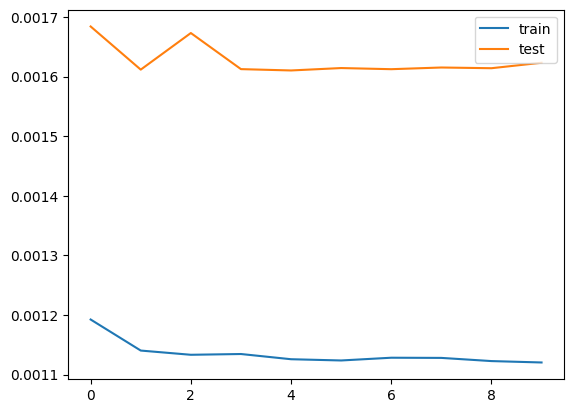

In [ ]:
# plot history

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
from lwhf.data.biqquery import BigQueryData

PROJECT = "le-wagon-hedge-fund"
DATASET = "data_alpaca_20240604"
TABLE = "SP500_Historical_Weekly"

data = BigQueryData(PROJECT, DATASET, TABLE)

In [ ]:
data.get_data(start_date='2018-01-04', end_date='2020-01-01')

le-wagon-hedge-fund-data_alpaca_20240604-SP500_Historical_Weekly-2018-01-04-2020-01-01.csv
✅ Found le-wagon-hedge-fund-data_alpaca_20240604-SP500_Historical_Weekly-2018-01-04-2020-01-01.csv in the local cache.


,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,AAPL,2018-01-08 05:00:00+00:00,174.35,177.36,173.0000,177.09,118768858.0,713765.0,174.937721
1,AAPL,2018-01-15 05:00:00+00:00,177.90,180.10,175.0700,178.46,140770878.0,759300.0,178.169627
2,AAPL,2018-01-22 05:00:00+00:00,177.30,179.44,170.0600,171.51,204970294.0,1238380.0,174.362602
3,AAPL,2018-01-29 05:00:00+00:00,170.16,170.16,160.1000,160.37,278094573.0,1811059.0,166.009440
4,AAPL,2018-02-05 05:00:00+00:00,159.10,163.88,150.2400,156.41,337562706.0,2185596.0,158.854360
...,...,...,...,...,...,...,...,...,...
50544,ZTS,2019-12-02 05:00:00+00:00,120.87,121.92,118.0000,121.72,14352938.0,103100.0,120.384558
50545,ZTS,2019-12-09 05:00:00+00:00,121.49,125.00,120.6305,124.45,9606285.0,88615.0,123.081489
50546,ZTS,2019-12-16 05:00:00+00:00,125.00,133.52,124.3700,132.68,16604525.0,105786.0,129.252094
50547,ZTS,2019-12-23 05:00:00+00:00,132.60,133.48,131.2900,133.25,5021308.0,45086.0,132.808859


In [ ]:
data.get_prices()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-08 05:00:00+00:00,71.73,58.470,115.94,177.09,100.34,99.00,58.84,160.11,195.05,92.02,...,35.49,74.66,87.52,65.79,32.77,70.46,83.62,122.10,53.28,75.39
2018-01-15 05:00:00+00:00,73.07,58.060,117.02,178.46,104.64,100.06,59.31,161.75,195.73,96.14,...,35.45,75.71,87.15,61.95,31.80,71.91,83.81,123.48,53.73,76.62
2018-01-22 05:00:00+00:00,74.82,53.070,123.64,171.51,123.21,105.48,63.42,162.55,201.30,93.84,...,36.67,71.94,89.00,62.84,32.83,74.41,86.20,126.23,54.02,80.09
2018-01-29 05:00:00+00:00,71.25,52.100,113.93,160.37,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.16,76.78
2018-02-05 05:00:00+00:00,66.98,48.360,109.14,156.41,111.30,89.19,57.17,153.84,187.99,83.93,...,41.86,65.38,75.78,57.18,29.61,70.82,79.31,116.39,51.64,72.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02 05:00:00+00:00,82.21,27.725,154.62,270.71,86.98,88.24,85.48,202.55,306.23,115.89,...,57.59,91.86,69.51,58.05,37.77,75.32,98.77,148.53,49.71,121.72
2019-12-09 05:00:00+00:00,83.71,27.480,155.21,275.15,87.84,84.85,86.35,206.66,317.94,118.77,...,57.59,96.23,69.23,56.38,36.84,77.72,100.11,148.07,51.15,124.45
2019-12-16 05:00:00+00:00,85.19,29.040,158.12,279.44,89.29,85.67,86.66,211.10,327.61,119.82,...,57.59,97.74,69.94,56.85,37.35,78.61,100.59,150.32,51.63,132.68


In [ ]:
data.get_returns()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-15 05:00:00+00:00,0.018681,-0.007012,0.009315,0.007736,0.042854,0.010707,0.007988,0.010243,0.003486,0.044773,...,-0.001127,0.014064,-0.004228,-0.058368,-0.029600,0.020579,0.002272,0.011302,0.008446,0.016315
2018-01-22 05:00:00+00:00,0.023950,-0.085946,0.056572,-0.038944,0.177466,0.054167,0.069297,0.004946,0.028458,-0.023923,...,0.034415,-0.049795,0.021228,0.014366,0.032390,0.034766,0.028517,0.022271,0.005397,0.045288
2018-01-29 05:00:00+00:00,-0.047715,-0.018278,-0.078534,-0.064952,-0.065254,-0.089685,-0.027278,-0.034759,-0.028117,-0.050405,...,0.043087,-0.018071,-0.050225,-0.044239,-0.036552,0.016799,-0.041415,-0.003486,0.002592,-0.041329
2018-02-05 05:00:00+00:00,-0.059930,-0.071785,-0.042043,-0.024693,-0.033603,-0.071131,-0.073270,-0.019503,-0.039102,-0.058130,...,0.094379,-0.074462,-0.103514,-0.047952,-0.063863,-0.063970,-0.040179,-0.074728,-0.046529,-0.057697
2018-02-12 05:00:00+00:00,0.074500,0.066584,-0.014385,0.102423,0.065588,0.114475,0.052475,0.057332,0.072185,0.025736,...,0.046345,0.026155,0.010029,0.021861,0.031746,0.062271,-0.013365,0.035140,0.066421,0.102004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02 05:00:00+00:00,0.017828,-0.035317,-0.015661,0.012947,-0.008549,0.003754,0.000351,0.006910,-0.010661,0.026029,...,0.000000,-0.009916,0.020255,0.026707,-0.029797,-0.028254,-0.018874,0.022371,-0.001406,0.009957
2019-12-09 05:00:00+00:00,0.018246,-0.008837,0.003816,0.016401,0.009887,-0.038418,0.010178,0.020291,0.038239,0.024851,...,0.000000,0.047572,-0.004028,-0.028768,-0.024623,0.031864,0.013567,-0.003097,0.028968,0.022429
2019-12-16 05:00:00+00:00,0.017680,0.056769,0.018749,0.015591,0.016507,0.009664,0.003590,0.021485,0.030415,0.008841,...,0.000000,0.015692,0.010256,0.008336,0.013844,0.011451,0.004795,0.015196,0.009384,0.066131


In [ ]:
returns = data.get_returns()
returns.index

DatetimeIndex(['2018-01-15 05:00:00+00:00', '2018-01-22 05:00:00+00:00',
               '2018-01-29 05:00:00+00:00', '2018-02-05 05:00:00+00:00',
               '2018-02-12 05:00:00+00:00', '2018-02-19 05:00:00+00:00',
               '2018-02-26 05:00:00+00:00', '2018-03-05 05:00:00+00:00',
               '2018-03-12 04:00:00+00:00', '2018-03-19 04:00:00+00:00',
               ...
               '2019-10-28 04:00:00+00:00', '2019-11-04 05:00:00+00:00',
               '2019-11-11 05:00:00+00:00', '2019-11-18 05:00:00+00:00',
               '2019-11-25 05:00:00+00:00', '2019-12-02 05:00:00+00:00',
               '2019-12-09 05:00:00+00:00', '2019-12-16 05:00:00+00:00',
               '2019-12-23 05:00:00+00:00', '2019-12-30 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=103, freq=None)

In [ ]:
X, y = data.get_Xy(based_on='returns')

Created X and y with shapes (469, 102, 1) and (469,)


In [1]:
as_of_date = '2020-01-01'

In [4]:
df = data.get_data('2016-01-04', as_of_date)

NameError: name 'data' is not defined

In [2]:
import datetime

n_periods = 3

as_of = datetime.datetime.strptime(as_of_date, '%Y-%m-%d').date()
starting_point = as_of - datetime.timedelta(days=7 * n_periods)

In [6]:
df['timestamp'].dt.date < starting_point

NameError: name 'df' is not defined

In [8]:
df['timestamp'].dt.date

NameError: name 'df' is not defined

In [ ]:
df['clean_date'] = df['timestamp']
df['clean_date'] = df['clean_date'].apply(lambda x: f'{x.year}-{x.month:02d}-{x.day:02d}')
df['clean_date']

0         2016-01-04
1         2016-01-11
2         2016-01-18
3         2016-01-25
4         2016-02-01
             ...    
102498    2019-12-02
102499    2019-12-09
102500    2019-12-16
102501    2019-12-23
102502    2019-12-30
Name: clean_date, Length: 102503, dtype: object

In [2]:
from lwhf.data.biqquery import BigQueryData

PROJECT = "le-wagon-hedge-fund"
DATASET = "data_alpaca_20240604"
TABLE = "SP500_Historical_Weekly"

data = BigQueryData(PROJECT, DATASET, TABLE)

In [3]:
import datetime

as_of_date = '2024-05-27'
n_periods = 3

In [4]:
from lwhf.portfolio.backtest import BackTester

backtester = BackTester(as_of_date, 3)

In [5]:
backtester.get_all_data()

le-wagon-hedge-fund-data_alpaca_20240604-SP500_Historical_Weekly-2016-01-04-2024-05-27.csv
✅ Found le-wagon-hedge-fund-data_alpaca_20240604-SP500_Historical_Weekly-2016-01-04-2024-05-27.csv in the local cache.


In [6]:
backtester.train_model()

Epoch 1/10


2024-06-12 14:28:03.506373: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10


In [7]:
port_return, weekly_returns, clean_weights = backtester.backtest()
print(port_return, weekly_returns, clean_weights)
# do a pie chart of the clean_weights

# import matplotlib.pyplot as plt

# plt.pie(clean_weights, labels=weekly_returns.index, autopct='%1.1f%%')

# plt.show()

14/14 [==============================] - 0s 9ms/step


/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:354: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add an explicit dependency on ECOS or switch to our new
    default solver, Clarabel, by either not specifying a solver argument
    or specifying ``solver=cp.CLARABEL``.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


14/14 [==============================] - 0s 9ms/step
0.036805265546873356 [0.05549581807630529, -0.091220578472161, 0.0808917272391434]            weights
A     2.350672e-13
AAL   2.016262e-13
AAP   2.485578e-13
AAPL  2.539976e-13
ABBV  3.980792e-13
...            ...
XYL   2.069326e-13
YUM   2.815753e-13
ZBH   3.084470e-13
ZION  2.046329e-13
ZTS   2.814538e-13

[421 rows x 1 columns]


In [9]:
from lwhf.portfolio.backtest import make_portfolio, estimate_covariance
from lwhf.data.biqquery import get_Xy
import numpy as np
import pandas as pd
import cvxpy
import riskfolio as rp

as_of = datetime.datetime.strptime(backtester.as_of_date, '%Y-%m-%d').date()
starting_point = as_of - datetime.timedelta(days=7 * backtester.n_periods)
returns_df = backtester.bq.returns

port_return = 1

while starting_point < as_of:
    one_week_ahead = starting_point + datetime.timedelta(days=7)
    pred_df = returns_df[returns_df.index.date < starting_point]
    pred_X, _ = get_Xy(pred_df)
    y_pred = backtester.model.predict(pred_X)
    cov_df = estimate_covariance(pred_df, 'exp_cov')
    print(f'----- Predicting for week {starting_point} to {one_week_ahead}')
    print(f' -- shape of pred_df: {pred_df.shape}')
    print(f' -- shape of pred_X: {pred_X.shape}')
    print(f' -- shape of y_pred: {y_pred.shape}')
    print(f' -- shape of cov_df: {cov_df.shape}')

    #display(cov_df)
    #display(cvxpy.psd_wrap(cov_df))
    #print(np.all(np.linalg.eigvals(cov_df) > 0))
    #y_pred[:,0] = 0.5
    #display(y_pred)
    # # try:
    # clean_weights = make_portfolio(backtester.bq.prices.columns,
    #                             y_pred.reshape(-1),
    #                             cov_df)
    port = rp.Portfolio(returns=pred_df)
    #find estimates for returns and covariance
    #port.assets_stats(method_mu=self.method_mu, method_cov=self.method_cov, d=0.94)
    # Input manually the custom parameters:
    #expected returns
    port.mu = y_pred.reshape(-1)  # Custom mean vector.
    port.cov = cov_df  # Custom covariance matrix.
    #find weights that maximizes Sharpe ratio (rm = 'MV'; Mean-Variance)
    clean_weights = port.optimization(model='Classic', rm='MV', obj='Sharpe', rf=0, l=0)

    # except:
    #     cvxpy.psd_wrap(cov_df)
    #     clean_weights = make_portfolio(backtester.bq.prices.columns,
    #                              y_pred.reshape(-1),
    #                              cov_df)

    prices_df = backtester.bq.prices
    print(f' -- shape of prices_df: {prices_df.shape}')
    week_df = prices_df[prices_df.index.date >= starting_point]
    week_df = week_df[week_df.index.date <= one_week_ahead]
    #display(week_df)
    print(f' -- shape of week_df: {week_df.shape}')
    ret = week_df.iloc[-1] / week_df.iloc[0] - 1
    weekly_return = (clean_weights.weights * ret).sum()

    print(f' -- weekly return: {weekly_return}')
    port_return *= (1+weekly_return)
    starting_point += datetime.timedelta(days=7)


port_return -= 1

14/14 [==============================] - 0s 8ms/step
----- Predicting for week 2024-05-06 to 2024-05-13
 -- shape of pred_df: (434, 421)
 -- shape of pred_X: (421, 433, 1)
 -- shape of y_pred: (421, 1)
 -- shape of cov_df: (421, 421)
 -- shape of prices_df: (439, 421)
 -- shape of week_df: (2, 421)
 -- weekly return: 0.012194375349337733
14/14 [==============================] - 0s 8ms/step
----- Predicting for week 2024-05-13 to 2024-05-20
 -- shape of pred_df: (435, 421)
 -- shape of pred_X: (421, 434, 1)
 -- shape of y_pred: (421, 1)
 -- shape of cov_df: (421, 421)
 -- shape of prices_df: (439, 421)
 -- shape of week_df: (2, 421)
 -- weekly return: -0.05868662828786218
14/14 [==============================] - 0s 9ms/step
----- Predicting for week 2024-05-20 to 2024-05-27
 -- shape of pred_df: (436, 421)
 -- shape of pred_X: (421, 435, 1)
 -- shape of y_pred: (421, 1)
 -- shape of cov_df: (421, 421)
 -- shape of prices_df: (439, 421)
 -- shape of week_df: (2, 421)
 -- weekly return: 0

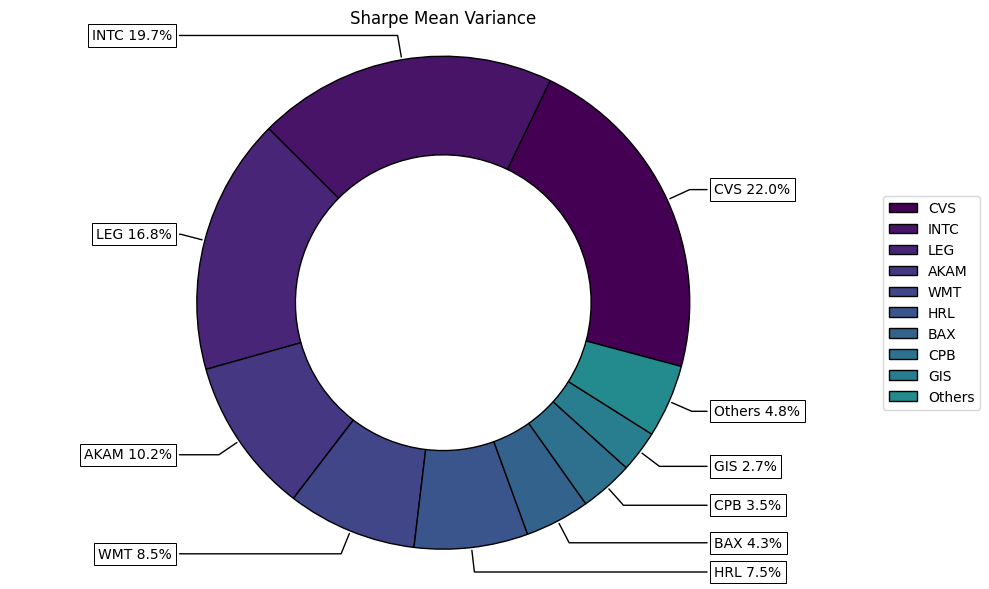

In [10]:
import matplotlib.pyplot as plt
import riskfolio as rp

cmap = plt.get_cmap("viridis")
ax = rp.plot_pie( w= clean_weights, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = 'viridis',
                        height=6, width=10, ax=None)